# Abgabe Data Exploration Project

# Auswahl Datensatz

In dieser Abgabe wird versucht, anhand der gegebenen Daten den Hauspreis weiterer Häuser zu bestimmen.
Bei dem Maschinen Learning wird in 3 Hauptgruppen unterschieden. Supervised learning(überwachtes Lernen), unsupervised learning(unüberwachtest Lernen) und reinforcement learning(bestärkendes lernen). 
Es wird sich für eine Regression(Teil des supervised learning) entschieden, da das Clustering(unsupervised learning) in "Gruppen" gliedert die ich jedoch nicht benötige, die Klassifikation(supervised learning) vorgegebene Kategorien braucht, die ich hier auch nicht benötige sonder wir durch eingabe verschiedener variablen den Wert einer vorherage treffen möchten.

Zusammenfassend kann gesagt werden, dass Clustering dabei hilft, die inhärente Struktur innerhalb eines Datensatzes zu entdecken, Klassifikation für das Zuordnen von Datenpunkten zu vordefinierten Kategorien verwendet wird, und Regression für die Vorhersage eines kontinuierlichen Wertes eingesetzt wird.

In [1]:
# benötigten Bibliotheken importieren
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns
import scipy.stats as sp
from sklearn.model_selection import train_test_split

data = pd.read_csv("Daten/data.csv")

In [2]:
# Überblick über den Datensatz
data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [3]:
# einfache Information der Daten
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

Hier wird der Datensatz erstmal auf Null-Werte überprüft, die später die Berechnungen verfälschen könnten. Wie jedoch zu sehen ist, enthält jede spalte genau 4600 Einträge was auf keine leeren Zeilen hinweist.

# Charakterisierung des Datensatzes

Um einen ersten Überblick zu bekommen, werden erste Informationen aus dem Datensatz angezeigt. Hierfür werden bereits vorhandene Funktionen aus bestehenden Bibliotheken benutzt.

In [4]:
# einfache Auswertung des Datensatzes
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [5]:
# Zählen und Ausgeben der Anzahl von Einträgen mit einem Hauspreis von 0
zero_price_count = (data.price == 0.0).sum()
print(f"Anzahl der Einträge mit einem Hauspreis von 0: {zero_price_count}")


Anzahl der Einträge mit einem Hauspreis von 0: 49


In [6]:
# Ersetzt alle 0-Werte in der 'price'-Spalte durch NaN
data['price'] = data['price'].replace(0, np.nan)

# Ermittelt und gibt die Anzahl der fehlenden Werte (NaNs) 
data.isnull().sum()

date              0
price            49
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront        0
view              0
condition         0
sqft_above        0
sqft_basement     0
yr_built          0
yr_renovated      0
street            0
city              0
statezip          0
country           0
dtype: int64

In [7]:
# Entfernt Zeilen mit NaN Einträge
data.dropna(inplace=True)
zero_price_count_after_cleaning = (data.price == 0).sum()
print(f"Anzahl der Einträge mit einem Hauspreis von 0 nach der Bereinigung: {zero_price_count_after_cleaning}")

Anzahl der Einträge mit einem Hauspreis von 0 nach der Bereinigung: 0


In [8]:
# Erzeugt und transponiert deskriptive Statistiken der numerischen Spalten.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4551.0,557905.899138,563929.871279,7800.0,326264.285715,465000.00,657500.0,26590000.0
bedrooms,4551.0,3.394639,0.904595,0.0,3.000000,3.00,4.0,9.0
bathrooms,4551.0,2.155021,0.776351,0.0,1.750000,2.25,2.5,8.0
sqft_living,4551.0,2132.372226,955.949708,370.0,1460.000000,1970.00,2610.0,13540.0
sqft_lot,4551.0,14835.280598,35964.077825,638.0,5000.000000,7680.00,10978.0,1074218.0
floors,4551.0,1.512195,0.538531,1.0,1.000000,1.50,2.0,3.5
waterfront,4551.0,0.006592,0.080932,0.0,0.000000,0.00,0.0,1.0
view,4551.0,0.234674,0.765373,0.0,0.000000,0.00,0.0,4.0
condition,4551.0,3.449352,0.675160,1.0,3.000000,3.00,4.0,5.0
sqft_above,4551.0,1822.221710,854.452888,370.0,1190.000000,1590.00,2300.0,9410.0


In [9]:
# Zählt eindeutige Werte je Spalte.
data.nunique(axis = 0)  

date               70
price            1740
bedrooms           10
bathrooms          26
sqft_living       561
sqft_lot         3087
floors              6
waterfront          2
view                5
condition           5
sqft_above        510
sqft_basement     207
yr_built          115
yr_renovated       59
street           4476
city               44
statezip           77
country             1
dtype: int64

Damit können wir überprüfen, ob viele verschiedenen Werte in dem Datenset enthalten sind und somit genug Datensätze für das training des Modells haben.

In [10]:
# One-Hot-Encodning der Städte und entfernen von Spalten
data = pd.get_dummies(data, columns=['city'], prefix=['city'], dtype=int)
data = data.drop(['date', 'street', 'statezip', 'country'], axis = 1)
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,...,0,0,1,0,0,0,0,0,0,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,...,0,1,0,0,0,0,0,0,0,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,...,0,0,0,0,0,0,0,0,0,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,...,0,0,0,0,0,0,0,0,0,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,...,0,1,0,0,0,0,0,0,0,0
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,...,0,0,0,0,0,0,0,0,0,0
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,...,0,0,0,0,0,0,0,0,0,0
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,...,0,1,0,0,0,0,0,0,0,0


In [11]:
# Überprüfung auf Duplikate
duplicate_count = data.duplicated().sum()
if duplicate_count > 0:
    print(f"Anzahl der Duplikate im Datensatz: {duplicate_count}")
else:
    print("Keine Duplikate gefunden.")

Keine Duplikate gefunden.


In [12]:
# IQR für den Preis pro Quadratfuß berechnen
data['price_per_sqft'] = data['price'] / data['sqft_living']
Q1_price_per_sqft = data['price_per_sqft'].quantile(0.25)
Q3_price_per_sqft = data['price_per_sqft'].quantile(0.75)
IQR_price_per_sqft = Q3_price_per_sqft - Q1_price_per_sqft
outlier_step_price_per_sqft = 5 * IQR_price_per_sqft

# Ausreißer für den Preis pro Quadratfuß finden
outliers_price_per_sqft = data[(data['price_per_sqft'] < Q1_price_per_sqft - outlier_step_price_per_sqft) | (data['price_per_sqft'] > Q3_price_per_sqft + outlier_step_price_per_sqft)]

# Ausreißer in einen neuen DataFrame speichern
data_outliers_price_per_sqft = outliers_price_per_sqft

# Anzahl der Ausreißer anzeigen
print(f"Anzahl der Ausreißer im Preis pro Quadratfuß: {data_outliers_price_per_sqft.shape[0]}")



Anzahl der Ausreißer im Preis pro Quadratfuß: 5


Nun ist die wichtige Frage, wieso gibt es Häuser die so wit von den anderen Häusern entfernt sind. Liegen diese in extrem teuren Gegenden? Sind sie gerade erst gebaut worden oder könnten es Fehler im Datensatz sein. Um weiter fortzufahren sollte hier weiter nachgegangen werden da es onst zu ungenauigkeiten beim training des Algorythmus kommen kann.

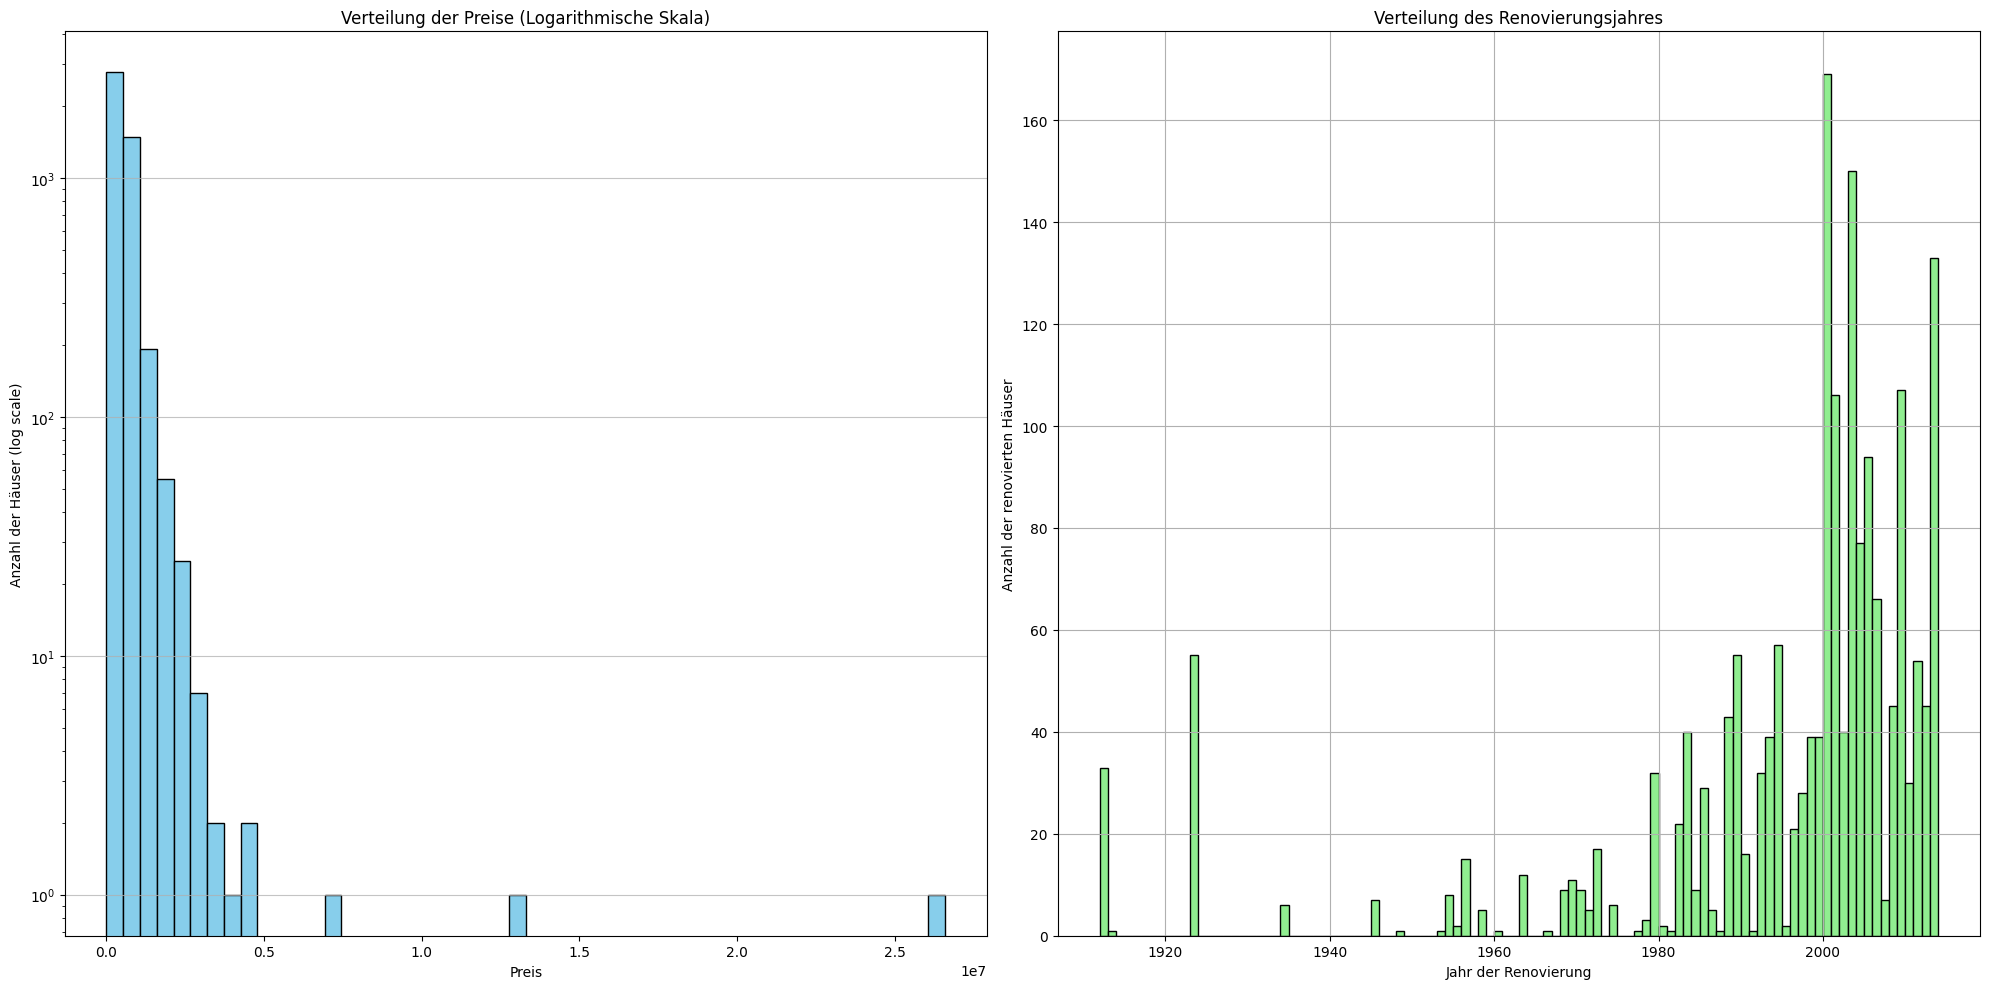

In [13]:
# Visualisiert Preisverteilung und Renovierungsjahre.
fig, ax = pyplot.subplots(1, 2, figsize=(20, 10))

renovated = data[data['yr_renovated'] > 0]
renovated['yr_renovated'].hist(ax=ax[1], bins=(renovated['yr_renovated'].max() - renovated['yr_renovated'].min()), color='lightgreen', edgecolor='black')
ax[1].set_title('Verteilung des Renovierungsjahres')
ax[1].set_xlabel('Jahr der Renovierung')
ax[1].set_ylabel('Anzahl der renovierten Häuser')

prices = data[data['price'] > 0]
ax[0].hist(prices['price'], bins=50, color='skyblue', edgecolor='black', log=True)
ax[0].set_title('Verteilung der Preise (Logarithmische Skala)')
ax[0].set_xlabel('Preis')
ax[0].set_ylabel('Anzahl der Häuser (log scale)')
ax[0].grid(axis='y', alpha=0.75)

pyplot.tight_layout()
pyplot.show()

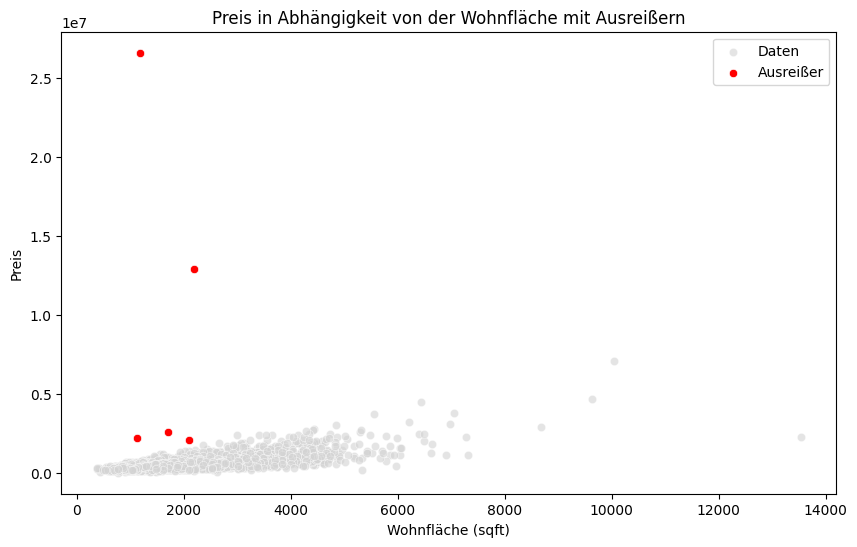

In [14]:
# Plot aller Daten
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=data, color='lightgray', alpha=0.6)

# Hervorheben der Ausreißer
sns.scatterplot(x='sqft_living', y='price', data=data_outliers_price_per_sqft, color='red')
pyplot.title('Preis in Abhängigkeit von der Wohnfläche mit Ausreißern')
pyplot.xlabel('Wohnfläche (sqft)')
pyplot.ylabel('Preis')
pyplot.legend(['Daten', 'Ausreißer'])
pyplot.show()


Hier ist gut in rot zu erkennen das es einige Häuser gibt, die für ihre geringe Wohnfläche einen extremen Wert erzielen. Nun sollten wir herausfinden, wieso diese Häuser solche extremen Werte erzielen und ob es sich um mögliche Fehler handelt.

In [15]:
#analyse der Ausreißer

In [16]:
# Für eine bessere Darstellung werden die Stadtspalten aus dem Datesatz genommen
filtered_columns = [col for col in data.columns if not col.startswith('city_')]
filtered_data = data[filtered_columns]

filtered_data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,price_per_sqft
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,233.582090
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,653.150685
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,177.202073
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,210.000000
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,283.505155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,204.083885
4596,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,365.981735
4597,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,138.506368
4598,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,97.320574


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>,
        <Axes: title={'center': 'price_per_sqft'}>, <Axes: >, <Axes: >]],
      dtype=object)

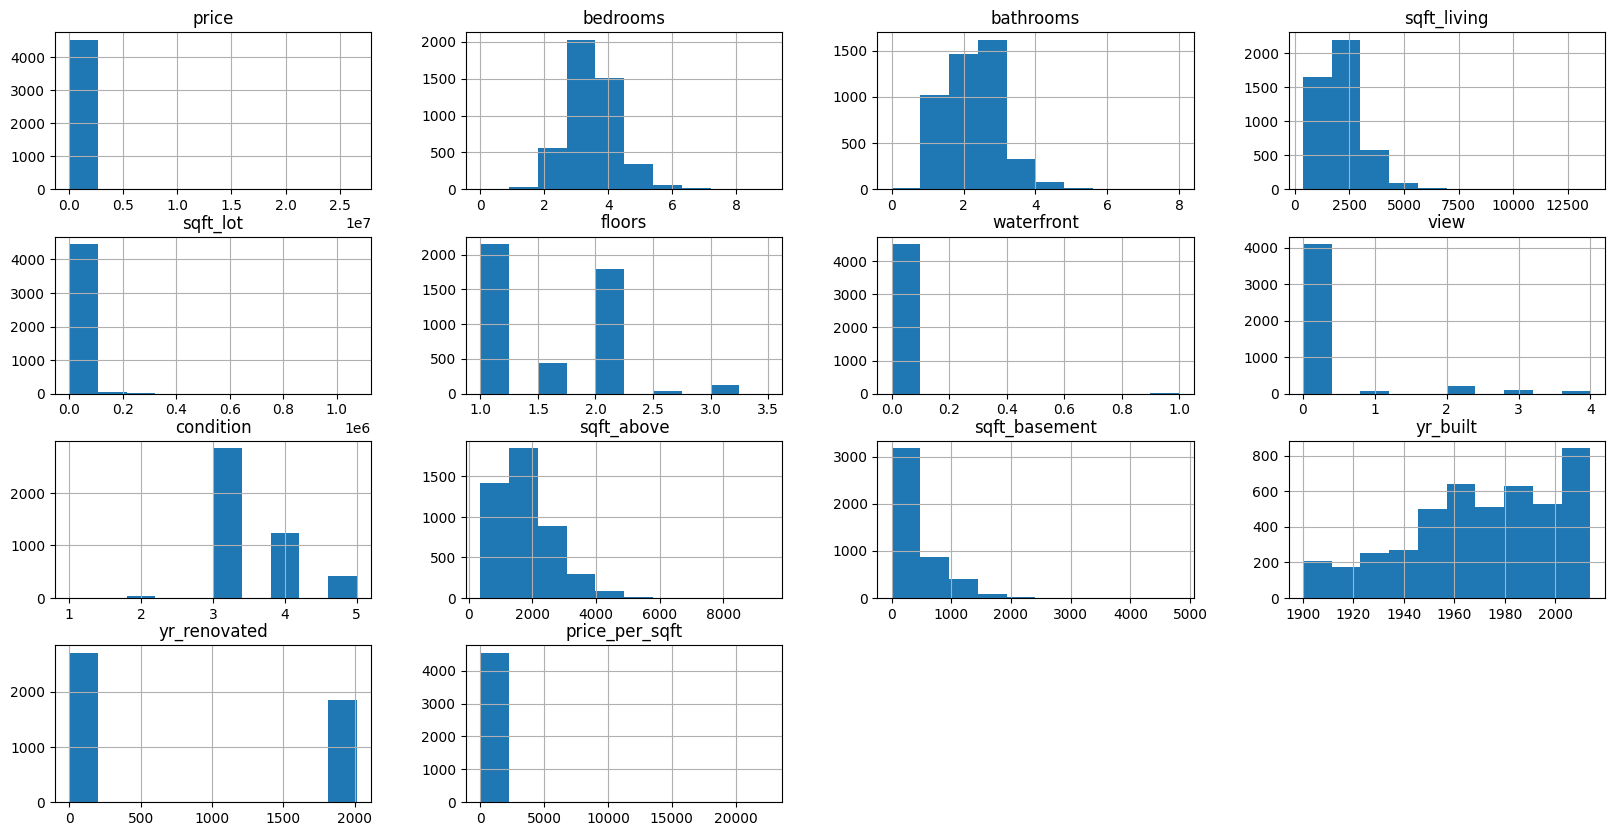

In [17]:
# Erstellt Histogramme für gefilterte Daten.
filtered_data.hist(figsize=(20, 10))

<Axes: >

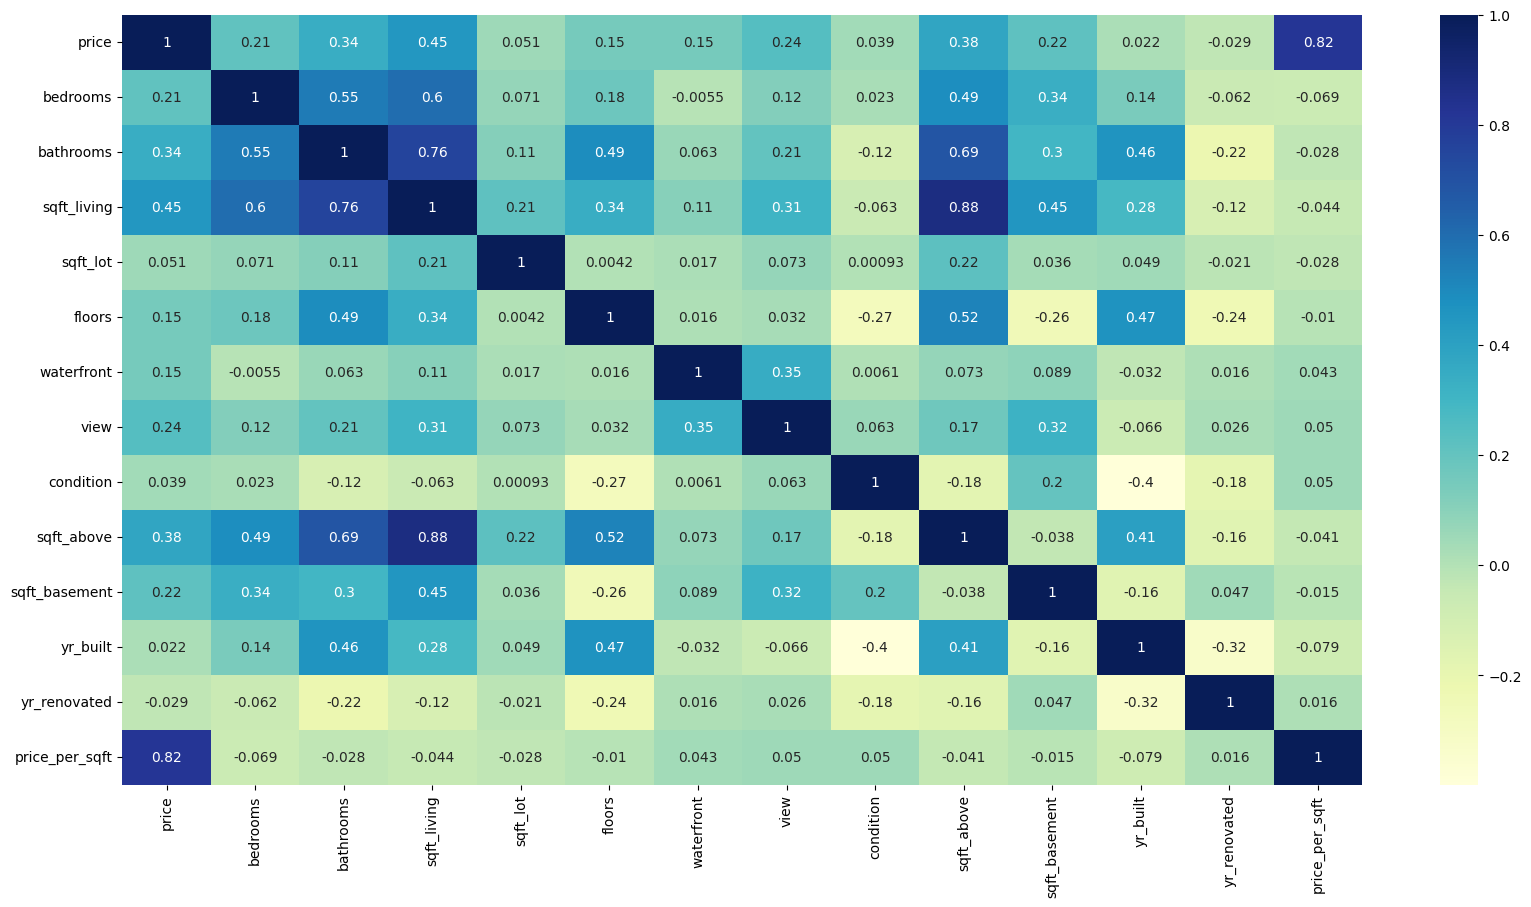

In [18]:
# Zeigt Korrelationsmatrix als Heatmap.
pyplot.figure(figsize=(20, 10))
filtered_data = filtered_data.select_dtypes(include=[np.number])
sns.heatmap(filtered_data.corr(), annot=True, cmap="YlGnBu")

# Split des Datensatzes

Die Aufteilung des Datensatzes in Training, Validierung und Test erfolgte im Verhältnis von 70:20:10. Damit ist sichergestellt, dass genügend Daten für das Erlernen der Muster (Training) vorhanden sind, während durch die Validierung und das Testset die Modellperformance umfassend bewertet werden kann. Dieses Vorgehen ermöglicht es, das Modell zu validieren und gleichzeitig ein unabhängiges Testset für die finale Leistungsbewertung bereitzuhalten, um Overfitting vorzubeugen und die Generalisierbarkeit des Modells zu prüfen.

In [19]:
# Trennt Merkmale (X) und Zielvariable (y).
X = data.drop(["price"], axis=1)
y = data["price"]

In [20]:
## Teilt Daten in Trainings-, Validierungs- und Testsätze.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

In [21]:
# Kombiniert Validierungsmerkmale und -ziel.
val_data = X_val.join(y_val)
val_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,price_per_sqft,price
869,4.0,1.00,1660,4690,1.5,0,0,3,1260,400,...,0,0,0,0,0,0,0,0,337.349398,560000.0
3063,3.0,2.50,1640,1269,3.0,0,0,3,1640,0,...,0,0,0,0,0,0,0,0,353.048780,579000.0
1824,2.0,2.50,2680,11214,1.0,0,0,3,2680,0,...,0,0,0,0,0,0,0,0,347.014925,930000.0
967,3.0,1.75,1480,7225,1.0,0,0,4,1480,0,...,0,0,0,0,0,0,0,0,216.216216,320000.0
3198,6.0,2.75,2840,8346,1.0,0,0,5,1420,1420,...,0,0,0,0,0,0,0,0,234.154930,665000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3212,3.0,1.00,1100,4128,1.0,0,0,4,720,380,...,0,0,0,0,0,0,0,0,308.181818,339000.0
642,3.0,1.00,1290,5500,1.0,0,0,3,980,310,...,0,0,0,0,0,0,0,0,288.542636,372220.0
2170,4.0,2.50,2350,63162,2.0,0,0,4,2350,0,...,0,0,0,0,0,0,1,0,276.574468,649950.0
4375,3.0,2.25,2950,78843,1.5,0,0,3,2950,0,...,0,0,0,0,0,0,0,0,345.762712,1020000.0


In [22]:
# Kombiniert Trainingssmerkmale und -ziel.
train_data = X_train.join(y_train)
train_data

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,price_per_sqft,price
1127,3.0,2.25,2760,40946,2.0,0,0,5,2760,0,...,0,0,0,0,0,0,0,0,429.347826,1185000.0
4407,3.0,2.00,1490,7770,1.0,0,0,4,1490,0,...,0,0,0,0,0,0,0,0,55.906040,83300.0
374,3.0,2.50,1540,1614,3.0,0,0,3,1470,70,...,0,0,0,0,0,0,0,0,268.474026,413450.0
2052,3.0,1.75,1980,3300,1.5,0,0,4,1140,840,...,0,0,0,0,0,0,0,0,333.333333,660000.0
3979,3.0,2.00,1860,4777,2.0,0,0,5,1860,0,...,0,0,0,0,0,0,0,0,316.129032,588000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3805,3.0,2.50,1450,1053,2.0,0,0,3,940,510,...,0,0,0,0,0,0,0,0,317.241379,460000.0
3702,3.0,2.50,3660,39478,2.0,0,2,4,3260,400,...,0,0,0,0,0,0,0,0,144.808743,530000.0
2674,3.0,1.50,1430,7347,1.0,0,0,3,820,610,...,0,0,0,0,0,0,0,0,138.461538,198000.0
756,3.0,2.00,1400,6200,1.0,0,0,3,700,700,...,1,0,0,0,0,0,0,0,171.428571,240000.0


# Feature Engineering